This is my attempt at implementing the final project

In [35]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


## 1. Read the datasets (given)

In [36]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
  
training_data = pd.read_csv('../data/final_project/training.csv')
test_data = pd.read_csv('../data/final_project/test_features.csv')

print('The shape of the training dataset is:', training_data.shape)
print('The shape of the test dataset is:', test_data.shape)

The shape of the training dataset is: (71538, 13)
The shape of the test dataset is: (23846, 12)


## 2. Train a model (implement)

### 2.1 Exploratory data analysis

In [37]:
training_data.head()

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Time at Center
0,A745079,Transfer,Unknown,NaN,7920 Old Lockhart in Travis (TX),Stray,Normal,Cat,Unknown,Domestic Shorthair Mix,Blue,3,0
1,A801765,Transfer,Intact Female,NaN,5006 Table Top in Austin (TX),Stray,Normal,Cat,Intact Female,Domestic Shorthair,Brown Tabby/White,28,0
2,A667965,Transfer,Neutered Male,NaN,14100 Thermal Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,Chihuahua Shorthair Mix,Brown/Tan,1825,0
3,A687551,Transfer,Intact Male,NaN,5811 Cedardale Dr in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby,28,0
4,A773004,Adoption,Neutered Male,*Boris,Highway 290 And Arterial A in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,Tricolor/Cream,365,0


In [38]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71538 entries, 0 to 71537
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pet ID                71538 non-null  object
 1   Outcome Type          71533 non-null  object
 2   Sex upon Outcome      71537 non-null  object
 3   Name                  44360 non-null  object
 4   Found Location        71538 non-null  object
 5   Intake Type           71538 non-null  object
 6   Intake Condition      71538 non-null  object
 7   Pet Type              71538 non-null  object
 8   Sex upon Intake       71537 non-null  object
 9   Breed                 71538 non-null  object
 10  Color                 71538 non-null  object
 11  Age upon Intake Days  71538 non-null  int64 
 12  Time at Center        71538 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 7.1+ MB


In [39]:
training_data.describe()

,Age upon Intake Days,Time at Center
count,71538.000000,71538.000000
mean,702.701487,0.087003
std,1051.158334,0.281841
min,0.000000,0.000000
25%,30.000000,0.000000
50%,365.000000,0.000000
75%,730.000000,0.000000
max,9125.000000,1.000000


In [40]:
print(training_data.columns)

Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days', 'Time at Center'],
      dtype='object')


Seperate the target outcome from the predicting features

In [41]:
model_features = training_data.columns.drop('Time at Center')
model_target = 'Time at Center'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days'],
      dtype='object')
Model target:  Time at Center


See which cells are numerical vs. categorical

In [42]:
import numpy as np
numerical_features_all = training_data[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)

print('')

categorical_features_all = training_data[model_features].select_dtypes(include='object').columns
print('Categorical columns:',categorical_features_all)

Numerical columns: Index(['Age upon Intake Days'], dtype='object')

Categorical columns: Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color'],
      dtype='object')


### Check target distribution

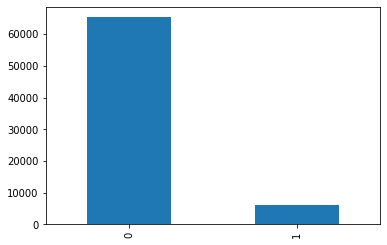

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

training_data[model_target].value_counts().plot.bar()
plt.show()

The dataset is clearly imbalanced, so we will need to upsample the 1 class later

### 2.2 Select features to build the model

In [44]:
numerical_features = ['Age upon Intake Days']

categorical_features = ['Sex upon Outcome', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake']

text_features = ['Name', 'Found Location', 'Breed', 'Color']

model_features = numerical_features + categorical_features + text_features
model_target = 'Time at Center'

Age upon Intake Days


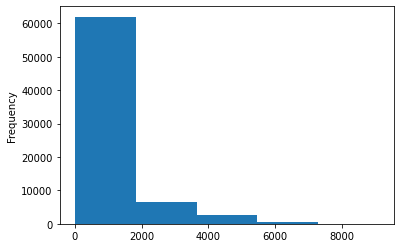

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in numerical_features:
    print(c)
    training_data[c].plot.hist(bins=5)
    plt.show()

In [46]:
for c in numerical_features: 
    print(c)
    print(training_data[c].value_counts(bins=10, sort=False))
    plt.show()

Age upon Intake Days
(-9.126, 912.5]     56111
(912.5, 1825.0]      7948
(1825.0, 2737.5]     2596
(2737.5, 3650.0]     2973
(3650.0, 4562.5]      954
(4562.5, 5475.0]      757
(5475.0, 6387.5]      135
(6387.5, 7300.0]       59
(7300.0, 8212.5]        3
(8212.5, 9125.0]        2
Name: Age upon Intake Days, dtype: int64


In [47]:
print(training_data[numerical_features].isna().sum())

Age upon Intake Days    0
dtype: int64


In [48]:
for c in categorical_features:
    print(c)
    print(training_data[c].unique()) #value_counts())

Sex upon Outcome
['Unknown' 'Intact Female' 'Neutered Male' 'Intact Male' 'Spayed Female'
 nan]
Intake Type
['Stray' 'Owner Surrender' 'Wildlife' 'Public Assist' 'Abandoned'
 'Euthanasia Request']
Intake Condition
['Normal' 'Nursing' 'Injured' 'Sick' 'Aged' 'Feral' 'Other' 'Pregnant'
 'Medical' 'Behavior']
Pet Type
['Cat' 'Dog' 'Other' 'Bird' 'Livestock']
Sex upon Intake
['Unknown' 'Intact Female' 'Neutered Male' 'Intact Male' 'Spayed Female'
 nan]


In [49]:
training_data[categorical_features + text_features] = training_data[categorical_features + text_features].astype('str')

In [50]:
print(training_data[categorical_features + text_features].isna().sum())

Sex upon Outcome    0
Intake Type         0
Intake Condition    0
Pet Type            0
Sex upon Intake     0
Name                0
Found Location      0
Breed               0
Color               0
dtype: int64


In [51]:
for c in text_features:
    print(c)
    print(training_data[c].unique()) #value_counts())

Name
['nan' '*Boris' '*Joshua' ... 'Mr Puppy' 'Secret' 'Durant']
Found Location
['7920 Old Lockhart in Travis (TX)' '5006 Table Top in Austin (TX)'
 '14100 Thermal Dr in Austin (TX)' ...
 'Dixie Dr And Rhett Pl in Austin (TX)' '3129 E 12Th St in Austin (TX)'
 '8701 Panadero Dr in Austin (TX)']
Breed
['Domestic Shorthair Mix' 'Domestic Shorthair' 'Chihuahua Shorthair Mix'
 ... 'Border Collie/English Springer Spaniel'
 'Norfolk Terrier/Yorkshire Terrier' 'Muscovy']
Color
['Blue' 'Brown Tabby/White' 'Brown/Tan' 'Brown Tabby' 'Tricolor/Cream'
 'Black/White' 'Torbie' 'Black/Tan' 'Lynx Point' 'Brown' 'Red/White'
 'Brown Merle' 'Buff' 'Black' 'Blue Tabby' 'Brown/White' 'White' 'Calico'
 'White/Black' 'Black/Brown' 'Tan/White' 'Seal Point'
 'White/Brown Brindle' 'Tan/Black' 'Gray Tabby' 'Fawn/White' 'Tortie'
 'White/Tan' 'Brown Brindle' 'Apricot/White' 'Blue/White' 'Sable' 'Tan'
 'Gray' 'White/Brown Tabby' 'White/Cream' 'Gray/Red' 'Tricolor'
 'Orange Tabby/White' 'Orange Tabby' 'Red/Gray' 'Bla

In [52]:
# Prepare cleaning functions
import re, string
import nltk
from nltk.stem import SnowballStemmer

stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

stemmer = SnowballStemmer('english')

def preProcessText(text):
    # lowercase and strip leading/trailing white space
    text = text.lower().strip()
    
    # remove HTML tags
    text = re.compile('<.*?>').sub('', text)
    
    # remove punctuation
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    
    # remove extra white space
    text = re.sub('\s+', ' ', text)
    
    return text

def lexiconProcess(text, stop_words, stemmer):
    filtered_sentence = []
    words = text.split(" ")
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(stemmer.stem(w))
    text = " ".join(filtered_sentence)
    
    return text

def cleanSentence(text, stop_words, stemmer):
    return lexiconProcess(preProcessText(text), stop_words, stemmer)

# Clean the text features
for c in text_features:
    print('Text cleaning: ', c)
    training_data[c] = [cleanSentence(item, stop_words, stemmer) for item in training_data[c].values]

Text cleaning:  Name
Text cleaning:  Found Location
Text cleaning:  Breed
Text cleaning:  Color


### 2.4 Model Training

Splitting and upsampling data

In [53]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(training_data, test_size=0.2, shuffle=True, random_state=23)
val_data, test_data = train_test_split(test_data, test_size=0.5, shuffle=True, random_state=23)

In [54]:
print('Training set shape:', train_data.shape)

print('Class 0 samples in the training set:', sum(train_data[model_target] == 0))
print('Class 1 samples in the training set:', sum(train_data[model_target] == 1))

print('Class 0 samples in the test set:', sum(test_data[model_target] == 0))
print('Class 1 samples in the test set:', sum(test_data[model_target] == 1))

Training set shape: (57230, 13)
Class 0 samples in the training set: 52275
Class 1 samples in the training set: 4955
Class 0 samples in the test set: 6536
Class 1 samples in the test set: 618


In [55]:
from sklearn.utils import shuffle

class_0_no = train_data[train_data[model_target] == 0]
class_1_no = train_data[train_data[model_target] == 1]

upsampled_class_0_no = class_0_no.sample(n=len(class_1_no), replace=True, random_state=42)

train_data = pd.concat([class_1_no, upsampled_class_0_no])
train_data = shuffle(train_data)

In [58]:
print('Training set shape:', train_data.shape)

print('Class 1 samples in the training set:', sum(train_data[model_target] == 1))
print('Class 0 samples in the training set:', sum(train_data[model_target] == 0))

print('Class 0 samples in the test set:', sum(test_data[model_target] == 0))
print('Class 1 samples in the test set:', sum(test_data[model_target] == 1))

Training set shape: (9910, 13)
Class 1 samples in the training set: 4955
Class 0 samples in the training set: 4955
Class 0 samples in the test set: 6536
Class 1 samples in the test set: 618


### implement pipeline to process data

In [63]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


### COLUMN_TRANSFORMER ###
##########################

# Preprocess the numerical features
numerical_processor = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', MinMaxScaler()) # Shown in case is needed, not a must with Decision Trees
                                ])
                  
# Preprocess the categorical features
categorical_processor = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Shown in case is needed, no effect here as we already imputed with 'nan' strings
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore')) # handle_unknown tells it to ignore (rather than throw an error for) any value that was not present in the initial training set.
                                ])

# Preprocess 1st text feature
text_processor_0 = Pipeline([
    ('text_vect_0', CountVectorizer(binary=True, max_features=50))
                                ])

# Preprocess 2nd text feature (larger vocabulary)
text_precessor_1 = Pipeline([
    ('text_vect_1', CountVectorizer(binary=True, max_features=150))
                                ])

# Combine all data preprocessors from above (add more, if you choose to define more!)
# For each processor/step specify: a name, the actual process, and finally the features to be processed
data_preprocessor = ColumnTransformer([
    ('numerical_pre', numerical_processor, numerical_features),
    ('categorical_pre', categorical_processor, categorical_features),
    ('text_pre_0', text_processor_0, text_features[0]),
    ('text_pre_1', text_precessor_1, text_features[1])
                                    ]) 

### DATA PREPROCESSING ###
##########################
# Get train data to train the network
X_train = train_data[model_features]
y_train = train_data[model_target]

# Get validation data to validate the network 
X_val = val_data[model_features]
y_val = val_data[model_target]

# Get test data to test the network
X_test = test_data[model_features]
y_test = test_data[model_target]

print('Datasets shapes before processing: ', X_train.shape, X_val.shape, X_test.shape)

X_train = data_preprocessor.fit_transform(X_train).toarray()
X_val = data_preprocessor.transform(X_val).toarray()
X_test = data_preprocessor.transform(X_test).toarray()

print('Datasets shapes after processing: ', X_train.shape, X_val.shape, X_test.shape)

pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('dt', DecisionTreeClassifier())
                    ])

# Visualize the pipeline
# This will come in handy especially when building more complex pipelines, stringing together multiple preprocessing steps
from sklearn import set_config
set_config(display='diagram')
pipeline

Datasets shapes before processing:  (9910, 10) (7154, 10) (7154, 10)
Datasets shapes after processing:  (9910, 231) (7154, 231) (7154, 231)


Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age upon Intake Days']),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex upon Outcome',
                                                   'Intake Type',
                                                   'Intake Condition',
                                                   'Pet Type',
                                                   'Sex upon Intake']),
                                                 ('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=50))]),
                                                  'Name'),
                                                 ('text_pre_1',
                                                  Pipeline(steps=[('text_vect_1',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=150))]),
                                                  'Found Location')])),
                ('dt', DecisionTreeClassifier())])

In [64]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Get train data to train the pipeline
X_train = train_data[model_features]
y_train = train_data[model_target]

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))

# Get test data to test the pipeline
X_test = test_data[model_features]
y_test = test_data[model_target]

# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))

[[4862   93]
 [ 220 4735]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4955
           1       0.98      0.96      0.97      4955

    accuracy                           0.97      9910
   macro avg       0.97      0.97      0.97      9910
weighted avg       0.97      0.97      0.97      9910

Accuracy (training): 0.9684157416750757
[[5196 1340]
 [ 139  479]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.88      6536
           1       0.26      0.78      0.39       618

    accuracy                           0.79      7154
   macro avg       0.62      0.79      0.63      7154
weighted avg       0.91      0.79      0.83      7154

Accuracy (test): 0.7932625104836455


In [65]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### PIPELINE GRID_SEARCH ###
############################

# Parameter grid for GridSearch
param_grid={'dt__max_depth': [100, 200, 300],#, 50, 75, 100, 125, 150, 200, 250], 
            'dt__min_samples_leaf': [5, 10, 15],#, 25, 30],
            'dt__min_samples_split': [2, 5, 15]#, 25, 30, 45, 50]
           }

grid_search = GridSearchCV(pipeline, # Base model
                           param_grid, # Parameters to try
                           cv = 5, # Apply 5-fold cross validation
                           verbose = 1, # Print summary
                           n_jobs = -1 # Use all available processors
                          )

# Fit the GridSearch to our training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data_preprocessing',
                                        ColumnTransformer(transformers=[('numerical_pre',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('num_scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Age '
                                                                          'upon '
                                                                          'Intake '
                                                                          'Days']),
                                                                        ('categorical_pre',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('cat_encoder',
                                                                                          OneH...
                                                                         Pipeline(steps=[('text_vect_0',
                                                                                          CountVectorizer(binary=True,
                                                                                                          max_features=50))]),
                                                                         'Name'),
                                                                        ('text_pre_1',
                                                                         Pipeline(steps=[('text_vect_1',
                                                                                          CountVectorizer(binary=True,
                                                                                                          max_features=150))]),
                                                                         'Found '
                                                                         'Location')])),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dt__max_depth': [100, 200, 300],
                         'dt__min_samples_leaf': [5, 10, 15],
                         'dt__min_samples_split': [2, 5, 15]},
             verbose=1)

In [66]:
print(grid_search.best_params_)
print(grid_search.best_score_)

# Get the best model out of GridSearchCV
classifier = grid_search.best_estimator_

# Fit the best model to the train data once more
classifier.fit(X_train, y_train)

{'dt__max_depth': 100, 'dt__min_samples_leaf': 10, 'dt__min_samples_split': 2}
0.8211907164480323


Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age upon Intake Days']),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')...
                                                  ['Sex upon Outcome',
                                                   'Intake Type',
                                                   'Intake Condition',
                                                   'Pet Type',
                                                   'Sex upon Intake']),
                                                 ('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=50))]),
                                                  'Name'),
                                                 ('text_pre_1',
                                                  Pipeline(steps=[('text_vect_1',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=150))]),
                                                  'Found Location')])),
                ('dt',
                 DecisionTreeClassifier(max_depth=100, min_samples_leaf=10))])

In [67]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Use the fitted model to make predictions on the train dataset
train_predictions = classifier.predict(X_train)

print('Model performance on the train set:')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Train accuracy:", accuracy_score(y_train, train_predictions))  

Model performance on the train set:
[[4395  560]
 [ 954 4001]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      4955
           1       0.88      0.81      0.84      4955

    accuracy                           0.85      9910
   macro avg       0.85      0.85      0.85      9910
weighted avg       0.85      0.85      0.85      9910

Train accuracy: 0.8472250252270433


In [68]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Get test data to test the classifier
X_test = test_data[model_features]
y_test = test_data[model_target]

# Use the fitted model to make predictions on the test dataset
# Test data going through the Pipeline it's first imputed (with means from the train), scaled (with the min/max from the train data), and finally used to make predictions
test_predictions = classifier.predict(X_test)

print('Model performance on the test set:')
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Test accuracy:", accuracy_score(y_test, test_predictions))

Model performance on the test set:
[[5632  904]
 [ 121  497]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      6536
           1       0.35      0.80      0.49       618

    accuracy                           0.86      7154
   macro avg       0.67      0.83      0.70      7154
weighted avg       0.93      0.86      0.88      7154

Test accuracy: 0.8567235113223372
